# $\text{Imported Libraries & Data}$

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sea
import time
from matplotlib import colors


data = np.loadtxt("eddington_data.txt")
x_vals_observed = data[:,0]
y_vals_observed = data[:,1]
Ex_vals_observed = data[:,2]
Ey_vals_observed = data[:,3]
Dx_vals_observed = data[:,4]
Dy_vals_observed = data[:,5]

# $\text{Model}$

In [191]:
def Dx_model(theta):
    return theta[1]*x_vals_observed + theta[2]*y_vals_observed + theta[3] + theta[0]*Ex_vals_observed

def Dy_model(theta):
    return theta[4]*x_vals_observed + theta[5]*y_vals_observed + theta[6] + theta[0]*Ey_vals_observed

def l_i(Dx_model,Dx_vals_observed):
    sigma = 0.05
    const = 1/(sigma*np.sqrt(2*np.pi))
    t1 = (-0.5/(sigma**2))*((Dx_vals_observed-Dx_model)**2)
    
    return np.log(const) + t1

def like_hood(theta):
    l_i_x = l_i(Dx_model(theta),Dx_vals_observed)
    l_i_y = l_i(Dy_model(theta),Dy_vals_observed)
    log_l_i = l_i_x+l_i_y
    sum_ = sum(log_l_i)
    return sum_

    
    

# $\text{MH-MCMC Algorithm}$

In [316]:
def MCMC(steps,theta_int,sigma):
    burn_in = int(0.2*steps)
    theta = np.zeros([steps,7])
    theta[0,:] = theta_int
    for i in range(1,steps):
        theta_current = theta[i-1,:]
        theta_proposed = np.random.normal(theta_current,sigma)
        
        t1 = like_hood(theta_current) ## likely hood for current theta
        
        ## since we know that alpha can't take negative value, so we are putting this condition
        if (theta_proposed[0])<=0:
            t2 = -np.inf  ###here we took infinite value such that likely hood becomes zero for this condition

        else:
            t2 = like_hood(theta_proposed)    ## likely hood for proposed theta
            
        acceptance_prob = min(1,np.exp(t2-t1)) # here we use exponantial because above we took log of likely hood
        
        ## Choosing an random number between 0 and 1
        delta = np.random.rand(1)[0]
        
        if delta<acceptance_prob:
            theta[i,:] = theta_proposed
            
        else:
            theta[i,:] = theta_current
            
    return theta[:,0][burn_in:]


# $\text{Eddington Problem}$

In [317]:
theta_int = [1,1,1,1,1,1,1]    ### initial value of all parameter
alpha_values = MCMC(15000,theta_int,0.01)

In [320]:
mean_alpha = np.mean(alpha_values)     
    
print('Mean value of alpha is',mean_alpha)

Mean value of alpha is 0.133054280746457


## $\text{Histogram of alpha values}$

/tmp/ipykernel_16972/2927126366.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs.grid(b = True, color ='grey',


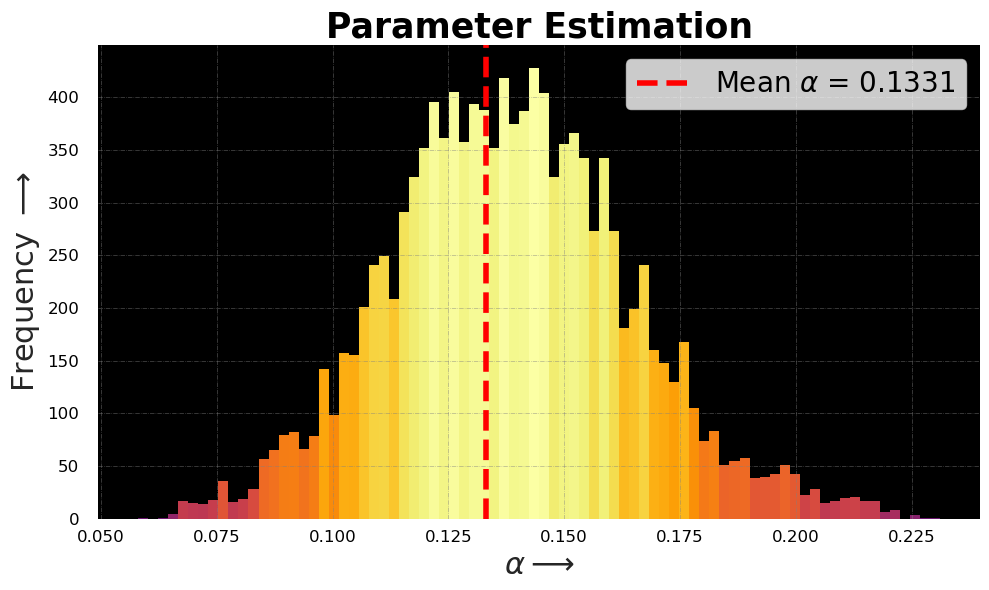

In [321]:
fig, axs = plt.subplots(1, 1,figsize =(10, 6),tight_layout = True)
axs.set_facecolor('black')

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)
 
#Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
   
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

# Creating histogram
N, bins, patches = axs.hist(kkk, bins =80)
 
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.inferno(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.axvline(x=mean_alpha,color='red',ls='--',lw=4.0,alpha=1.0,
            label = 'Mean $\\alpha$ = %.4f'%mean_alpha) 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("$\\alpha \longrightarrow$",size=22,alpha=0.85)
plt.ylabel("Frequency $\longrightarrow$",size=22,alpha=0.85)
plt.legend(fontsize = 20)
plt.title('Parameter Estimation',fontsize = 25,fontweight = 'bold')
 
# Show plot
plt.show()

In [322]:
theta_value = 19.8*mean_alpha        ### multiply α by 19.8 to translate it to the bending 
                                    #inferred at the limb of the Sun (in arcsec)

print('the value of theta is',theta_value)


the value of theta is 2.6344747587798487
